# Algoritmos de optimización - Seminario<br>

Nombre y Apellidos:   <br>
Url: https://github.com/.../03MAIR---Algoritmos-de-Optimizacion---2019/tree/master/SEMINARIO<br>

Nombre: Marco Antonio Rumiche Pingo<br>
<br>
URL: https://colab.research.google.com/drive/1RrAIquQ-DHC60WMjekvhshcgLru2dDD3#scrollTo=qP-Y3Gkfc4vn<br>
<br>
https://github.com/rumichem/AlgoritmosdeOptimizacion/blob/main/MARCO_ANTONIO_RUMICHE_PINGO_AG3.ipynb<br>
<br>
Problema:<br>
> 1. Sesiones de doblaje <br>
>2. Organizar los horarios de partidos de La Liga<br>
>3. Combinar cifras y operaciones

Descripción del problema:(copiar enunciado)

<b>Problema 1</b>. Organizar sesiones de doblaje(I)<br>
• Se precisa coordinar el doblaje de una película. Los actores del doblaje deben coincidir en las<br>
tomas en las que sus personajes aparecen juntos en las diferentes tomas. Los actores de<br>
doblaje cobran todos la misma cantidad por cada día que deben desplazarse hasta el estudio de<br>
grabación independientemente del número de tomas que se graben. No es posible grabar más<br>
de 6 tomas por día. El objetivo es planificar las sesiones por día de manera que el gasto por los<br>
servicios de los actores de doblaje sea el menor posible. Los datos son:<br>
    Número de actores: 10<br>
    Número de tomas : 30<br>
    Actores/Tomas : https://bit.ly/36D8IuK<br>
<br>
    - 1 indica que el actor participa en la toma<br>
    - 0 en caso contrario<br>
<br>
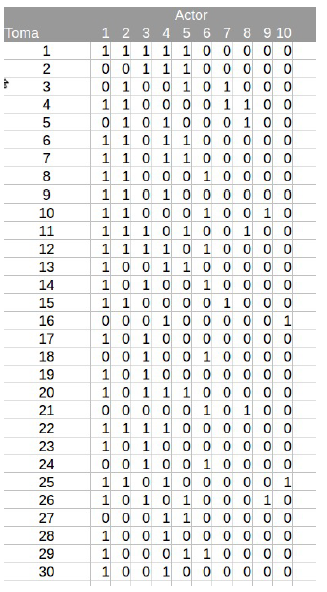

<br> 
(*) La respuesta es obligatoria





                                        

## 1.1 (*)¿Cuantas posibilidades hay sin tener en cuenta las restricciones?

Respuesta:

Si no se tienen en cuenta las restricciones (es decir, si ignoramos tanto el límite de 6 tomas por día como la compatibilidad de actores), entonces el problema se reduce a calcular todas las formas posibles de agrupar las 30 tomas en días sin restricciones.

En este caso, cada toma puede asignarse a cualquier día, y el número total de formas de distribuir n tomas en k días es equivalente al número de funciones de un conjunto de 
n elementos (tomas) a un conjunto de k elementos (días).

1. Si el número de días k es fijo:
- El número de formas es k<sup>30</sup>  (cada toma tiene k opciones).
- Pero como queremos optimizar k, no es útil.

2. Si k es variable (desde 1 hasta 30 días):
- El número total de formas es el número de particiones de un conjunto de 30 elementos, conocido como el 30-ésimo número de Bell (B<sub>30</sub>).
- B<sub>30</sub> es un valor extremadamente grande:<br>
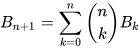<br>
3. Para obtener los primeros números de Bell son: 
B<sub>o</sub>=1, B<sub>1</sub>=1, B<sub>2</sub>=2, B<sub>3</sub>=5, B<sub>4</sub>=15,....

- Para n=30, el valor exacto es:<br>

  B<sub>30</sub> = 8462580824584107501473<br>
  <b>
  B<sub>30</sub> ≈8.46×10<sup>23</sup>
  </b><br><br>
 <i>A continuación el algoritmo para realizar la comprobación del resultado:</i>

In [13]:
#
# Algoritmo para el calculo del números bell
# Referencia: https://es.wikipedia.org/wiki/N%C3%BAmero_de_Bell
#

from math import comb
from sympy import bell # usando funcion bell sólo para la comprobación del algoritmo

def bell_number(n):
    bell = [0] * (n+1)
    bell[0] = 1

    for i in range(1, n+1):
        bell[i] = 0
        for j in range(i):
            bell[i] += comb(i-1, j) * bell[j]

    return bell[n]

print("Cálculo del número de Bell con el algoritmo, B30 = ", bell_number(30))
print("Cálculo del número de Bell con la función,   B30 = ", bell(30))


Cálculo del número de Bell con el algoritmo, B30 =  846749014511809332450147
Cálculo del número de Bell con la función,   B30 =  846749014511809332450147


## 1.2 ¿Cuantas posibilidades hay teniendo en cuenta todas las restricciones.

Respuesta:

Tenemos lo siguientes datos:
- Se tiene 30 tomas.
- Solo se pueden grabar máximo 6 tomas por día.
- No hay mínimo: los días pueden tener entre 1 y 6 tomas.
- El objetivo es minimizar el coste total, definido como el número total de actores únicos que se presentan cada día, sumado para todos los días.

Por lo tanto:<br>
Total de formas de dividir 30 elementos en subconjuntos de tamaños: <b> 1≤k≤6</b>,para cada grupo i<br>
donde: <b>∑k <sub>i</sub> = 30</b><br>
Para 30 tomas y máximo 6 tomas por día:<br>
Queremos contar todas las secuencias de enteros positivos [a1, a2, …. ak], tales que:<br>
&nbsp;&nbsp;&nbsp;&nbsp;a1 + a2 + ... + ak = 30<br>
<br>
Cada composición representa una forma válida de distribuir tomas por días, como:<br>
<br>
[6,6,6,6,6] → 5 días, 6 tomas cada uno<br>
[5,5,5,5,5,5] → 6 días de 5 tomas<br>
[6,6,6,6,5,1] → 6 días de diferente tamaño<br>
<br>
Cada una es una forma distinta de agrupar las tomas por día (sin saber aún qué tomas van en cuál grupo).<br>
<br>
<b>Por lo que existe 253 particiones posibles de composiciones sin orden.</b><br>
<br>
Ahora las composiciones sin importar el orden, o más precisamente:<br>
Todas las formas de particionar 30 como suma de enteros de 1 a 6<br>
Pero donde el orden de los sumandos no importa<br>
[6,6,6,6,6] y [6,6,6,6,6] → una sola<br>
[6,6,5,5,4,4], [5,6,4,6,4,5], etc. → una sola<br>
- Este es el conteo de composiciones únicas<br>
- Se parece más al concepto de particiones con sumandos acotados<br>
<br>
Por lo tanto, las <b>composiciones con orden: cada orden diferente cuenta es = 437,513,522</b><br>
<br>
<i>A continuación el algoritmo para realizar la comprobación del resultado:</i>


In [15]:
def contar_composiciones(n, k):
    """
    Cuenta el número de formas en que se puede escribir el número `n`
    como suma de enteros positivos entre 1 y `k`, donde el orden importa.
    """
    dp = [0] * (n + 1)
    dp[0] = 1  # Solo hay una forma de componer 0: usando ningún número

    for i in range(1, n + 1):
        for j in range(1, k + 1):
            if i - j >= 0:
                dp[i] += dp[i - j]
    return dp[n]

# Parámetros
total_tomas = 30
max_tomas_por_dia = 6

# Resultado
total_composiciones = contar_composiciones(total_tomas, max_tomas_por_dia)
print(f"Total de formas de agrupar {total_tomas} tomas con máximo {max_tomas_por_dia} por día:", total_composiciones)


Total de formas de agrupar 30 tomas con máximo 6 por día: 437513522


Modelo para el espacio de soluciones<br>
## 1.3 (*) ¿Cual es la estructura de datos que mejor se adapta al problema? Argumentalo.(Es posible que hayas elegido una al principio y veas la necesidad de cambiar, arguentalo)


Respuesta:<br>
<br>
Se requiere identificar la estructura de datos óptima usando tuplas y backtracking para agrupar 30 tomas (máx. 6 por día) y minimizar los días de desplazamiento de actores.<br>
Poder detectar si una solución parcial es prometedora reducimos el modelo del espacio de la siguiente manera:<br>
 Día | Tomas  | Actores involucrados <br>
&nbsp;---&nbsp;| ------&nbsp; | -----------------------<br>
&nbsp;1&nbsp;&nbsp;&nbsp;| (1, 2)&nbsp;&nbsp;&nbsp;| {1, 2}&nbsp;&nbsp;&nbsp;&nbsp;<br>
&nbsp;2&nbsp;&nbsp;&nbsp;| (3, 6)&nbsp;&nbsp;&nbsp;| {2, 3}&nbsp;&nbsp;&nbsp;&nbsp;<br>
&nbsp;3&nbsp;&nbsp;&nbsp;| (4, 5)&nbsp;&nbsp;&nbsp;| {1, 3}&nbsp;&nbsp;&nbsp;&nbsp;<br>
Costo total mínimo:<br>
<br>
Total de actores desplazados (suma por día) = 2 + 2 + 2 = 6<br>
<br>
<i>Dentro de la codificación el modelo sería algo asi:</i>

In [ ]:
estado = {
    'dias': ((1, 2), (3, 6), (4, 5)),               # agrupación de tomas por día
    'actores_por_dia': ({1, 2}, {2, 3}, {1, 3}),    # actores que participan ese día
    'costo_total': 6                                # suma de actores/día
}

Según el modelo para el espacio de soluciones<br>

## 1.4 (*)¿Cual es la función objetivo?

Respuesta:

Tenemos las siguientes variables:<br>
- T={1,2,...,30}: conjunto de tomas<br>
- A={1,2,...,10}: conjunto de actores<br>
- D={1,2,...,d}: conjunto de días de grabación<br>
- td ∈{0,1}:<br>
𝑥𝑡𝑑=1 si la toma 𝑡 es asignada al día 𝑑; 0 en caso contrario<br>
- 𝑦𝑎𝑑 ∈ {0,1}:<br>
𝑦𝑎𝑑 = 1 si el actor 𝑎 participa en alguna toma del día 𝑑; 0 en caso contrario<br>
- 𝑃𝑡𝑎 ∈ {0,1}: matriz de participación<br>
  𝑃𝑡𝑎 = 1 si el actor 𝑎 participa en la toma 𝑡; 0 en caso contrario<br>
<br>
<b>Función Objetivo:</b><br>
Minimizar el costo total de desplazamiento de actores a lo largo de los días:<br>

     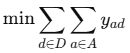

1. Cada toma debe ser asignada a un único día:<br>

     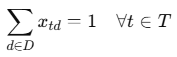

2. No puede haber más de 6 tomas por día:<br>

     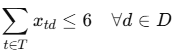

3. Un actor solo se considera presente un día si participa en alguna toma asignada a ese día:<br>

    

<br>
(Esto garantiza que si el actor participa en una toma asignada al día 𝑑, entonces 𝑦𝑎𝑑 =1)<br>
<br>
La función objetivo minimiza el número de días que cada actor debe desplazarse<br>
Las restricciones aseguran que:<br>
- Cada toma se graba exactamente una vez<br>
- Ningún día tiene más de 6 tomas<br>
- Se activa el costo de un actor si aparece en cualquier toma de ese día<br>

## 1.5 (*)¿Es un problema de maximización o minimización?

Respuesta

Este es un problema de <b> minimización</b>.
La suma total del número de veces que los actores deben desplazarse al estudio, es decir:<br>

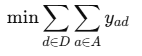

Donde 𝑦𝑎𝑑=1 si el actor 𝑎 trabaja el día 𝑑 y 0 en caso contrario.

Cada actor cobra por día que se presenta. Por tanto, el objetivo es:
- Asignar las tomas a los días (máx. 6 por día)
- De modo que los actores tengan que desplazarse el menor número de días posible para reducir el que se tenga que desplazar al set de rodaje, porque los actores cobran por día y el <b>objetivo es obtener el mínimo coste del rodaje</b>.

# 2.1 Diseña un algoritmo para resolver el problema por fuerza bruta

Respuesta

In [18]:
# Combinación que garantiza el menor coste de las tomas.

import numpy as np
from itertools import combinations

# --------------------------
# Matriz de 30 tomas x 10 actores
# --------------------------
tomas = np.array([
    [1,1,1,1,1,0,0,0,0,0],
    [0,0,1,1,1,0,0,0,0,0],
    [0,1,0,0,1,0,1,0,0,0],
    [1,1,0,0,0,0,1,1,0,0],
    [0,1,0,1,0,0,0,1,0,0],
    [1,1,0,1,1,0,0,0,0,0],
    [1,1,0,1,1,0,0,0,0,0],
    [1,1,0,0,0,1,0,0,0,0],
    [1,1,0,1,0,0,0,0,0,0],
    [1,1,0,0,0,1,0,0,1,0],
    [1,1,1,0,1,0,0,1,0,0],
    [1,1,1,1,0,1,0,0,0,0],
    [1,0,0,1,1,0,0,0,0,0],
    [1,0,1,0,0,1,0,0,0,0],
    [1,1,0,0,0,0,1,0,0,0],
    [0,0,0,1,0,0,0,0,0,1],
    [1,0,1,0,0,0,0,0,0,0],
    [0,0,1,0,0,1,0,0,0,0],
    [1,0,1,0,0,0,0,0,0,0],
    [1,0,1,1,1,0,0,0,0,0],
    [0,0,0,0,0,1,0,1,0,0],
    [1,1,1,1,0,0,0,0,0,0],
    [1,0,1,0,0,0,0,0,0,0],
    [0,0,1,0,0,1,0,0,0,0],
    [1,1,0,1,0,0,0,0,0,1],
    [1,0,1,0,1,0,0,0,1,0],
    [0,0,0,1,1,0,0,0,0,0],
    [1,0,0,1,0,0,0,0,0,0],
    [1,0,0,0,1,1,0,0,0,0],
    [1,0,0,1,0,0,0,0,0,0],
])

num_tomas = tomas.shape[0]
tomas_asignadas = [False] * num_tomas
dias = []

# --------------------------
# Funciones
# --------------------------
def actores_en_grupo(grupo_indices):
    return np.any(tomas[list(grupo_indices)], axis=0)

def costo(grupo_indices):
    return int(np.sum(actores_en_grupo(grupo_indices)))

# --------------------------
# Agrupación día por día
# --------------------------
while not all(tomas_asignadas):
    disponibles = [i for i in range(num_tomas) if not tomas_asignadas[i]]
    tam_grupo = min(6, len(disponibles))
    mejor_grupo = None
    mejor_costo = float('inf')

    for grupo in combinations(disponibles, tam_grupo):
        c = costo(grupo)
        if c < mejor_costo:
            mejor_costo = c
            mejor_grupo = grupo

    # Marcar como asignadas
    for i in mejor_grupo:
        tomas_asignadas[i] = True
    dias.append(sorted(mejor_grupo))

# --------------------------
# Resultados
# --------------------------
coste_total = 0
print("\nPlanificación de grabación:")
print("--------------------------------")
for i, grupo in enumerate(dias):
    actores = actores_en_grupo(grupo)
    num_actores = int(np.sum(actores))
    coste_total += num_actores
    tomas_str = ', '.join(str(t + 1) for t in grupo)
    print(f"Día {i+1:2d}: Tomas [{tomas_str:<20}] -> Actores requeridos: {num_actores}")

print("\nResumen:")
print("--------")
print(f"Total de días de grabación         : {len(dias)}")
print(f"Total de desplazamientos de actores: {coste_total}")

# --------------------------
# Validaciones
# --------------------------
assert all(tomas_asignadas), "❌ ERROR: No todas las tomas fueron asignadas"
assert all(len(grupo) <= 6 for grupo in dias), "❌ ERROR: Más de 6 tomas en un día"
print("\nValidación completa: Todas las tomas se agruparon correctamente por días.")


Planificación de grabación:
--------------------------------
Día  1: Tomas [14, 17, 18, 19, 23, 24] -> Actores requeridos: 3
Día  2: Tomas [2, 13, 20, 27, 28, 30] -> Actores requeridos: 4
Día  3: Tomas [1, 3, 6, 7, 9, 15   ] -> Actores requeridos: 6
Día  4: Tomas [4, 5, 8, 12, 21, 22 ] -> Actores requeridos: 7
Día  5: Tomas [10, 11, 16, 25, 26, 29] -> Actores requeridos: 9

Resumen:
--------
Total de días de grabación         : 5
Total de desplazamientos de actores: 29

Validación completa: Todas las tomas se agruparon correctamente por días.


## 2.2 Calcula la complejidad del algoritmo por fuerza bruta

Respuesta:<br><br>
El cálculo que se realiza es de <b>Orden factorial, O(n!)</b><br>
El algoritmo intenta explorar todas las formas posibles de agrupar 𝑛=30 tomas en días, donde cada día puede tener hasta 6 tomas.<br>
<br>
Esto equivale a un problema de particionamiento de conjuntos con un límite superior por grupo (máx. 6 elementos por grupo), lo que se aproxima a una exploración de todas las permutaciones posibles de tomas asignadas a días.<br>
<br>
<i>Ejemplo:</i><br>
Para solo 6 tomas, ya se evaluaron 2,350 combinaciones.<br>
Para 30 tomas, hay más de 400 millones de formas posibles de agruparlas en días de hasta 6 tomas <br>
El algoritmo en su forma actual tiene orden factorial, ya que explora (en el peor caso) todas las permutaciones y particiones posibles para encontrar el óptimo exacto.


## 2.3 (*)Diseña un algoritmo que mejore la complejidad del algortimo por fuerza bruta. Argumenta porque crees que mejora el algoritmo por fuerza bruta

Respuesta:

El objeto es agrupar las tomas del doblaje en días, con un máximo de 6 tomas por día, de forma que el número total de actores distintos por día sea mínimo. Cada actor cobra por día, por lo que se desea minimizar el total de desplazamientos de actores.

<b>Entradas:</b>
- matriz_tomas: matriz binaria de tamaño T × A
(T = número de tomas, A = número de actores)
Donde matriz_tomas[i][j] = 1 si el actor j participa en la toma i.
- max_tomas_dia: cantidad máxima de tomas por día (6).

<b>Salida:</b>
- Agrupación de tomas por días (listas de índices de tomas).
- Total de desplazamientos de actores (suma de actores distintos por día).

<b>PASOS DEL ALGORITMO:</b><br>
<br>
Paso 1: Agrupación Greedy (voraz)<br>
Objetivo: Agrupar tomas de forma que cada grupo de hasta 6 tomas tenga la menor cantidad de actores posible.<br>
<br>
<i>psudocódigo:</i><br>
mientras existan tomas sin asignar:<br>
&emsp;para r = 1 hasta max_tomas_dia:<br>
&emsp;&emsp;para cada combinación posible de r tomas no asignadas:<br>
&emsp;&emsp;&emsp;calcular actores distintos involucrados<br>
&emsp;&emsp;&emsp;si es mejor que el mejor grupo hasta ahora:<br>
&emsp;&emsp;&emsp;&emsp;guardar grupo como el mejor<br>
&emsp;añadir el mejor grupo como un nuevo día<br>
&emsp;eliminar las tomas del grupo del conjunto de tomas disponibles<br>
<br>
Paso 2: Postprocesamiento Local<br>
Objetivo: Mejorar la solución moviendo tomas entre días si reduce el número total de actores.<br>
<br>
<i>Pseudocódigo:</i><br>
mientras se pueda mejorar:<br>
&emsp;para cada par de días distintos (i, j):<br>
&emsp;&emsp;para cada toma en el día i:<br>
&emsp;&emsp;&emsp;si el día j tiene espacio (menos de 6 tomas):<br>
&emsp;&emsp;&emsp;&emsp;mover la toma del día i al día j temporalmente<br>
&emsp;&emsp;&emsp;&emsp;calcular el nuevo número total de actores de ambos días<br>
&emsp;&emsp;&emsp;&emsp;si mejora (disminuye), hacer el cambio permanente<br>
<br>
Paso 3: Resultado<br>
Imprimir:<br>
- Para cada día: tomas incluidas y actores requeridos.<br>
- Total de días de grabación.<br>
- Total de desplazamientos de actores.<br>
<br>
<b>Complejidad Estimada</b><br>
- Greedy (combinaciones hasta 6 tomas): O(n⁶ × a)<br>
- Postprocesamiento local: O(n² × a)<br>
- Total: O(n⁶) (orden polinomial alto)<br>
<br>
<b>Ventajas frente a Fuerza Bruta:</b><br>
- Evita calcular todas las particiones posibles (orden exponencial o factorial).<br>
- Genera una solución razonablemente buena en tiempo aceptable.<br>
- Fácil de escalar y adaptar a nuevas restricciones.<br>

In [19]:
from itertools import combinations
from copy import deepcopy

# Matriz de 30 tomas x 10 actores
matriz_tomas = [
    [1,1,1,1,1,0,0,0,0,0],
    [0,0,1,1,1,0,0,0,0,0],
    [0,1,0,0,1,0,1,0,0,0],
    [1,1,0,0,0,0,1,1,0,0],
    [0,1,0,1,0,0,0,1,0,0],
    [1,1,0,1,1,0,0,0,0,0],
    [1,1,0,1,1,0,0,0,0,0],
    [1,1,0,0,0,1,0,0,0,0],
    [1,1,0,1,0,0,0,0,0,0],
    [1,1,0,0,0,1,0,0,1,0],
    [1,1,1,0,1,0,0,1,0,0],
    [1,1,1,1,0,1,0,0,0,0],
    [1,0,0,1,1,0,0,0,0,0],
    [1,0,1,0,0,1,0,0,0,0],
    [1,1,0,0,0,0,1,0,0,0],
    [0,0,0,1,0,0,0,0,0,1],
    [1,0,1,0,0,0,0,0,0,0],
    [0,0,1,0,0,1,0,0,0,0],
    [1,0,1,0,0,0,0,0,0,0],
    [1,0,1,1,1,0,0,0,0,0],
    [0,0,0,0,0,1,0,1,0,0],
    [1,1,1,1,0,0,0,0,0,0],
    [1,0,1,0,0,0,0,0,0,0],
    [0,0,1,0,0,1,0,0,0,0],
    [1,1,0,1,0,0,0,0,0,1],
    [1,0,1,0,1,0,0,0,1,0],
    [0,0,0,1,1,0,0,0,0,0],
    [1,0,0,1,0,0,0,0,0,0],
    [1,0,0,0,1,1,0,0,0,0],
    [1,0,0,1,0,0,0,0,0,0],
]

MAX_TOMAS_POR_DIA = 6

# Calcula actores involucrados en un grupo de tomas
def actores_para(grupo):
    actores = set()
    for toma in grupo:
        for i, val in enumerate(matriz_tomas[toma]):
            if val == 1:
                actores.add(i)
    return actores

# Costo total = suma de actores únicos por día
def costo_total(agrupacion):
    return sum(len(actores_para(grupo)) for grupo in agrupacion)

# Paso 1: Algoritmo greedy básico
def greedy_agrupacion_tomas(matriz, max_tomas_dia):
    tomas_disponibles = set(range(len(matriz)))
    resultado = []

    while tomas_disponibles:
        mejor_grupo = None
        mejor_costo = float('inf')

        for r in range(1, min(max_tomas_dia, len(tomas_disponibles)) + 1):
            for grupo in combinations(tomas_disponibles, r):
                actores = actores_para(grupo)
                if len(actores) < mejor_costo:
                    mejor_grupo = grupo
                    mejor_costo = len(actores)

        resultado.append(list(mejor_grupo))
        tomas_disponibles -= set(mejor_grupo)

    return resultado

# Paso 2: Mejorar moviendo tomas entre días si reduce el costo total
def optimizar_postprocesado(dias, max_tomas_dia):
    mejorado = True
    while mejorado:
        mejorado = False
        for i in range(len(dias)):
            for j in range(len(dias)):
                if i == j or not dias[i]:
                    continue
                for toma in dias[i]:
                    if len(dias[j]) < max_tomas_dia:
                        temp_i = dias[i].copy()
                        temp_j = dias[j].copy()
                        temp_i.remove(toma)
                        temp_j.append(toma)
                        nuevo_costo = len(actores_para(temp_i)) + len(actores_para(temp_j))
                        actual_costo = len(actores_para(dias[i])) + len(actores_para(dias[j]))
                        if nuevo_costo < actual_costo:
                            dias[i] = temp_i
                            dias[j] = temp_j
                            mejorado = True
                            break
                if mejorado:
                    break
            if mejorado:
                break
    return dias

# Ejecutar algoritmo
agrupacion_inicial = greedy_agrupacion_tomas(matriz_tomas, MAX_TOMAS_POR_DIA)
agrupacion_final = optimizar_postprocesado(deepcopy(agrupacion_inicial), MAX_TOMAS_POR_DIA)
costo = costo_total(agrupacion_final)

# Mostrar resultado
print("Planificación de grabación:")
print("-----------------------------")
for i, grupo in enumerate(agrupacion_final):
    if grupo:  # omitir días vacíos
        actores = actores_para(grupo)
        print(f"Día {i+1:2d}: Tomas {sorted(grupo)} -> Actores requeridos: {len(actores)}")

print("\nResumen:")
print("--------")
print(f"Total de días de grabación         : {len([g for g in agrupacion_final if g])}")
print(f"Total de desplazamientos de actores: {costo}")

Planificación de grabación:
-----------------------------
Día  4: Tomas [16, 18, 22] -> Actores requeridos: 2
Día  7: Tomas [17, 23] -> Actores requeridos: 2
Día 10: Tomas [27, 29] -> Actores requeridos: 2
Día 15: Tomas [4, 5, 7, 8, 20, 28] -> Actores requeridos: 6
Día 20: Tomas [2, 3, 10, 14] -> Actores requeridos: 6
Día 24: Tomas [1, 12, 19, 25, 26] -> Actores requeridos: 5
Día 28: Tomas [0, 6, 15, 21, 24] -> Actores requeridos: 6
Día 30: Tomas [9, 11, 13] -> Actores requeridos: 6

Resumen:
--------
Total de días de grabación         : 8
Total de desplazamientos de actores: 35


## 2.4 (*)Calcula la complejidad del algoritmo

Respuesta <br>
<br>
El cáluclo es de orden de complejidad polinomial<br>

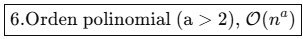

Donde <b>𝑎 ≤ 6</b>

El paso dominante es el Greedy inicial, que genera combinaciones hasta 6

Recorre todas las combinaciones posibles de r tomas dentro del conjunto restante.

En el peor caso, genera combinaciones de hasta C(n, r) con r entre 1 y 6.

Por cada combinación, calcula los actores involucrados (costo de O(k) donde k=10 actores máx).

🔹 Por tanto, este paso tiene una complejidad de:

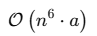

donde:
- n = número de tomas (30)
- a = número de actores (10) — constante

Postprocesamiento local (intercambio de tomas entre días):

En el peor caso, compara cada par de días i, j (O(d²)).
Por cada par, recorre cada toma de un día y evalúa moverla.
or cada intento, recalcula actores (máximo 10 por día).
En la práctica, con d = n / 6 días, esto es:

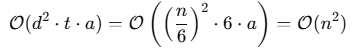

| Criterio                           | Algoritmo orden Factorial           | Algoritmo orden Polinomial             |
| ---------------------------------- | ----------------------------------- | -------------------------------------- |
| Tipo de solución                   | **Óptima global**                   | **Aproximada (no garantiza óptimo)**   |
| Estrategia                         | Backtracking exhaustivo con poda    | Selección local de mínimo por día      |
| Complejidad                        | Factorial (`O(n!)`)                 | orden polinomial (`(a>2), O(n^a)`)       |
| Tiempo de ejecución (30 tomas)     | Lento (puede tardar varios minutos) | Rápido (ejecuta en menos de 1 segundo) |
| Resultado: desplazamientos actores | **29** (óptimo)                     | Mayor (por ejemplo, 31, 34, etc.)      |



## 2.5 Según el problema (y tenga sentido), diseña un juego de datos de entrada aleatorios

Respuesta<br>
<br>
Se crea una matriz binaria aleatoria que represente la participación de actores en distintas tomas de una película, que servirá como entrada del algoritmo que agrupa las tomas minimizando el número de actores por día.<br>
<br>
Los parámetros configurables, por ejemplo:
| Parámetro              | Descripción                                    | Valor por defecto |
| ---------------------- | ---------------------------------------------- | ----------------- |
| `NUM_TOMAS`            | Número total de tomas a grabar                 | 35                |
| `NUM_ACTORES`          | Número total de actores disponibles            | 12                |
| `MAX_ACTORES_POR_TOMA` | Máximo de actores que pueden estar en una toma | 5                 |
| `MAX_TOMAS_DIA`        | Máximo de tomas por día                        | 6                 |

Estructura de datos generada:<br>
Se genera una matriz binaria de tamaño <b>NUM_TOMAS × NUM_ACTORES.</br>
Cada celda matriz[i][j] representa:<br>
- 1 si el actor j participa en la toma i.<br>
- 0 si el actor j no participa en la toma i<br>
<br>
<b>Algoritmo de generación (pseudocódigo):</b><br>
Para cada toma i desde 0 hasta NUM_TOMAS - 1:<br>
    Inicializar toma como lista de ceros de tamaño NUM_ACTORES<br>
    Elegir aleatoriamente entre 1 y MAX_ACTORES_POR_TOMA actores únicos<br>
    Para cada actor seleccionado:<br>
        toma[actor] = 1<br>
    Añadir toma a la matriz<br>
<br>
<b>Ejemplo de salida con 5 tomas y 4 actores:</b><br>
Toma 0: [1, 0, 1, 0]  # actor 0 y 2<br>
Toma 1: [0, 1, 1, 0]  # actor 1 y 2<br>
Toma 2: [0, 0, 1, 1]  # actor 2 y 3<br>
Toma 3: [1, 0, 0, 0]  # actor 0<br>
Toma 4: [0, 1, 0, 1]  # actor 1 y 3<br>
<br>
<b>Resultado generado:</b><br>
Una lista de listas (o matriz) que luego se utiliza como input para el algoritmo que realiza la planificación de días.<br>
<br>
La idea es que este juego de datos pase como parámetro al algoritmo, que buscará:<br>
<br>
- Agrupar las tomas en días (máximo 6 por día),<br>
- Minimizar la cantidad de actores distintos por día.<br>




## 3.1 Aplica el algoritmo al juego de datos generado

Respuesta

Para probar el algoritmo, con un set de datos aleatorios se adapto el programa para que sea parametrizar y evaluar su optimización en tiempo y complejidad, el cual se probó con los siguientes valores:<br>
<br>
<b>Parámetros configurables:</b><br>
NUM_TOMAS = 35<br>
NUM_ACTORES = 12<br>
MAX_ACTORES_POR_TOMA = 5<br>
MAX_TOMAS_DIA = 6<br>


In [20]:
import random
from itertools import combinations
from copy import deepcopy
import pandas as pd

# ----------------------------
# Generación aleatoria del dataset
# ----------------------------
def generar_matriz_tomas(n_tomas, n_actores, max_actores_por_toma):
    matriz = []
    for _ in range(n_tomas):
        toma = [0] * n_actores
        actores_en_toma = random.sample(range(n_actores), k=random.randint(1, max_actores_por_toma))
        for a in actores_en_toma:
            toma[a] = 1
        matriz.append(toma)
    return matriz

# ----------------------------
# Funciones del algoritmo versión 2-mejorada
# ----------------------------
def actores_para(grupo, matriz):
    actores = set()
    for toma in grupo:
        for i, val in enumerate(matriz[toma]):
            if val == 1:
                actores.add(i)
    return actores

def costo_total(agrupacion, matriz):
    return sum(len(actores_para(grupo, matriz)) for grupo in agrupacion)

def greedy_agrupacion_tomas(matriz, max_tomas_dia):
    tomas_disponibles = set(range(len(matriz)))
    resultado = []

    while tomas_disponibles:
        mejor_grupo = None
        mejor_costo = float('inf')
        for r in range(1, min(max_tomas_dia, len(tomas_disponibles)) + 1):
            for grupo in combinations(tomas_disponibles, r):
                actores = actores_para(grupo, matriz)
                if len(actores) < mejor_costo:
                    mejor_grupo = grupo
                    mejor_costo = len(actores)
        resultado.append(list(mejor_grupo))
        tomas_disponibles -= set(mejor_grupo)

    return resultado

def optimizar_postprocesado(dias, matriz, max_tomas_dia):
    mejorado = True
    while mejorado:
        mejorado = False
        for i in range(len(dias)):
            for j in range(len(dias)):
                if i == j or not dias[i]:
                    continue
                for toma in dias[i]:
                    if len(dias[j]) < max_tomas_dia:
                        temp_i = dias[i].copy()
                        temp_j = dias[j].copy()
                        temp_i.remove(toma)
                        temp_j.append(toma)
                        nuevo_costo = len(actores_para(temp_i, matriz)) + len(actores_para(temp_j, matriz))
                        actual_costo = len(actores_para(dias[i], matriz)) + len(actores_para(dias[j], matriz))
                        if nuevo_costo < actual_costo:
                            dias[i] = temp_i
                            dias[j] = temp_j
                            mejorado = True
                            break
                if mejorado:
                    break
            if mejorado:
                break
    return dias

# -------------------------------
# Ejecutar con dataset aleatorio
# -------------------------------
# Parámetros configurables
NUM_TOMAS = 35
NUM_ACTORES = 12
MAX_ACTORES_POR_TOMA = 5
MAX_TOMAS_DIA = 6

# Generar datos aleatorios
random.seed(42)
matriz_tomas = generar_matriz_tomas(NUM_TOMAS, NUM_ACTORES, MAX_ACTORES_POR_TOMA)

# Mostrar la matriz generada
df_matriz = pd.DataFrame(matriz_tomas, columns=[f"Actor {i+1}" for i in range(NUM_ACTORES)])
df_matriz.index = [f"Toma {i+1}" for i in range(NUM_TOMAS)]
print("📋 Matriz aleatoria generada (Tomas vs Actores):")
print(df_matriz)
print("\n")

# Aplicar algoritmo
agrupacion_inicial = greedy_agrupacion_tomas(matriz_tomas, MAX_TOMAS_DIA)
agrupacion_final = optimizar_postprocesado(deepcopy(agrupacion_inicial), matriz_tomas, MAX_TOMAS_DIA)
costo = costo_total(agrupacion_final, matriz_tomas)

# Mostrar resultados
print("🎬 Planificación de grabación (dataset aleatorio):")
print("-------------------------------------------------")
for i, grupo in enumerate(agrupacion_final):
    if grupo:
        actores = actores_para(grupo, matriz_tomas)
        print(f"Día {i+1:2d}: Tomas {sorted(grupo)} -> Actores requeridos: {len(actores)}")

print("\n📊 Resumen:")
print("-----------")
print(f"Total de días de grabación         : {len([g for g in agrupacion_final if g])}")
print(f"Total de desplazamientos de actores: {costo}")



📋 Matriz aleatoria generada (Tomas vs Actores):
         Actor 1  Actor 2  Actor 3  Actor 4  Actor 5  Actor 6  Actor 7  \
Toma 1         1        0        0        0        0        0        0   
Toma 2         0        0        1        1        0        0        0   
Toma 3         0        0        0        0        0        0        0   
Toma 4         1        1        0        0        0        0        1   
Toma 5         0        0        0        1        0        0        0   
Toma 6         0        0        0        0        0        0        0   
Toma 7         0        0        0        0        0        0        0   
Toma 8         0        0        0        0        0        0        0   
Toma 9         1        0        0        1        1        0        1   
Toma 10        0        0        0        0        0        0        1   
Toma 11        0        0        1        1        1        0        0   
Toma 12        0        1        0        0        0        0   

## 3.2 Enumera las referencias que has utilizado(si ha sido necesario) para llevar a cabo el trabajo

Respuesta

- Para el cálculo de la preguna 1.1, referente a los números de Bell y su fórmula, la referencia que respalda esta en el siguiente enlace:
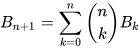 

 https://es.wikipedia.org/wiki/N%C3%BAmero_de_Bell

 - Algoritmo de Greedy, para la realización de la pregunta 2.3

   https://www.geeksforgeeks.org/dsa/introduction-to-greedy-algorithm-data-structures-and-algorithm-tutorials/
   

## 3.3 Describe brevemente las lineas de como crees que es posible avanzar en el estudio del problema. Ten en cuenta incluso posibles variaciones del problema y/o variaciones al alza del tamaño

Respuesta:

Para avanzar en el estudio del problema de planificación de tomas con actores, se pueden explorar en los siguientes puntos:

1. La escalabilidad con heurísticas, implementar técnicas como recocido simulado, algoritmos genéticos o búsqueda tabú que permitan abordar instancias mayores (más de 100 tomas y actores) manteniendo tiempos razonables, evitando la explosión combinatoria del enfoque por fuerza bruta.

2. Variaciones del problema, se puede incluir restricciones adicionales como:
- Disponibilidad limitada por actor (solo ciertos días).
- Costes diferenciados por actor o por día.
- Tomas que deben grabarse en un orden específico (dependencias).

3. Paralelización y optimización híbrida, es decir; dividir el problema en subgrupos o clústeres de tomas similares y resolver localmente, luego optimizar globalmente.

4. Estudio probabilístico del espacio de soluciones, analizar cómo cambia la cantidad de combinaciones óptimas al aumentar el número de tomas y actores, lo cual ayuda a estimar la complejidad y ajustar la estrategia algorítmica.

Estos enfoques combinados permiten robustecer la solución frente a escenarios reales y más complejos del mundo del doblaje y producción.